In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
sns.set_context('notebook')

RANDOM_SEED = 20090425

In [2]:
import pymc3
    
from pymc3 import Poisson
x = Poisson.dist(mu=1)

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
samples = x.random(size=10000)

In [4]:
samples.mean()

1.0062

(array([3688., 3642., 1833.,  644.,  150.,   36.,    7.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

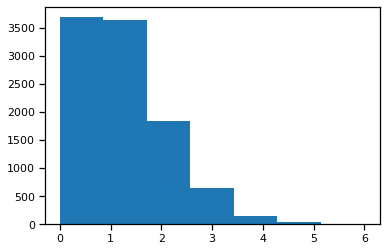

In [5]:
plt.hist(samples, bins=len(set(samples)))

In [6]:
from pymc3 import Normal
y = Normal.dist(mu=-2, sd=4)
samples = y.random(size=10000)

In [7]:
samples.mean()

-1.9483741951016036

In [8]:
samples.std()

4.025103898006148

(array([  22.,  125.,  554., 1484., 2578., 2723., 1727.,  637.,  138.,
          12.]),
 array([-16.77318727, -13.84757889, -10.92197051,  -7.99636213,
         -5.07075375,  -2.14514537,   0.78046301,   3.70607139,
          6.63167977,   9.55728815,  12.48289653]),
 <BarContainer object of 10 artists>)

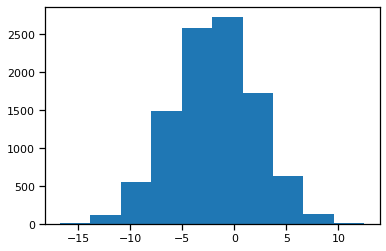

In [9]:
plt.hist(samples)

In [10]:
radon = pd.read_csv('radon.csv', index_col=0)

In [11]:
radon.head()

,idnum,state,state2,stfips,zip,region,typebldg,floor,room,basement,...,pcterr,adjwt,dupflag,zipflag,cntyfips,county,fips,Uppm,county_code,log_radon
0,5081.0,MN,MN,27.0,55735,5.0,1.0,1.0,3.0,N,...,9.7,1146.499190,1.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
1,5082.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,Y,...,14.5,471.366223,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
2,5083.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,Y,...,9.6,433.316718,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,1.098612
3,5084.0,MN,MN,27.0,56469,5.0,1.0,0.0,4.0,Y,...,24.3,461.623670,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.095310
4,5085.0,MN,MN,27.0,55011,3.0,1.0,0.0,4.0,Y,...,13.8,433.316718,0.0,0.0,3.0,ANOKA,27003.0,0.428565,1,1.163151


D:\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_radon', ylabel='Density'>

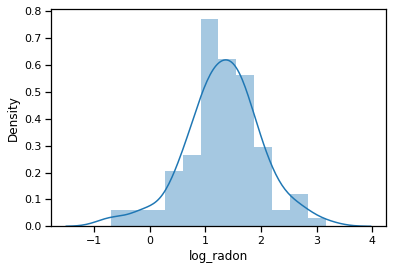

In [12]:
hennepin_radon = radon.query('county=="HENNEPIN"').log_radon
sns.distplot(hennepin_radon)

In [14]:
hennepin_radon.shape

(105,)

In [15]:
from pymc3 import Model, Uniform
with Model() as radon_model:
    u = Normal('u', mu=0, sd=10)
    o = Uniform('o', 0, 10)


You can find the C code in this temporary file: C:\Users\JON\AppData\Local\Temp\theano_compilation_error_1jtzmc5e


Exception: ('Compilation failed (return status=1): cc1plus.exe: sorry, unimplemented: 64-bit mode not compiled in. ', 'FunctionGraph(Elemwise{true_div,no_inplace}(TensorConstant{1.0}, TensorConstant{0.01}))')

In [16]:
with radon_model:
    y = Normal('y', mu=u, sd=0, observed=hennepin_radon)

NameError: name 'u' is not defined

In [17]:
from pymc3 import fit
with radon_model:
    samples = fit(random_seed=RANDOM_SEED).sample(1000)

TypeError: Model does not have FreeRVs

<AxesSubplot:title={'center':'x'}>

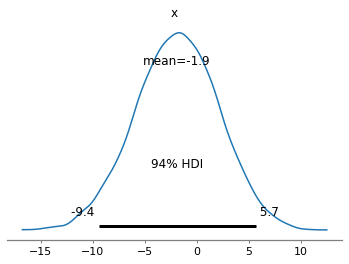

In [18]:
from pymc3 import plot_posterior
plot_posterior(samples)

In [19]:
mus = samples['u']
sigmas = samples['o']
mus

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [21]:
radon_samples = Normal.dist(mus, sigmas).random()

NameError: name 'mus' is not defined

In [22]:
(radon_samples > np.log(4)).mean()

NameError: name 'radon_samples' is not defined

In [23]:
sns.distplot(radon_samples, label='simulated')
sns.distplot(hennepin_radon, label='observed')
plt.legend()

NameError: name 'radon_samples' is not defined

In [ ]:
from pymc3 import Flat, HalfCauchy

with Model() as prior_sensitivity:
    u = Flat('u')
    o = HalfCauchy()